In [1]:
import pandas as pd
import numpy as ny
import statsmodels.api as sm
import seaborn as sbn
import matplotlib.pyplot as plt
import statsmodels.api as sa
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score, StratifiedKFold,RandomizedSearchCV
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

# Data

In [2]:
water = pd.read_csv('water_potability.csv')
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
x = water[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
y = water['Potability']

In [5]:
water['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

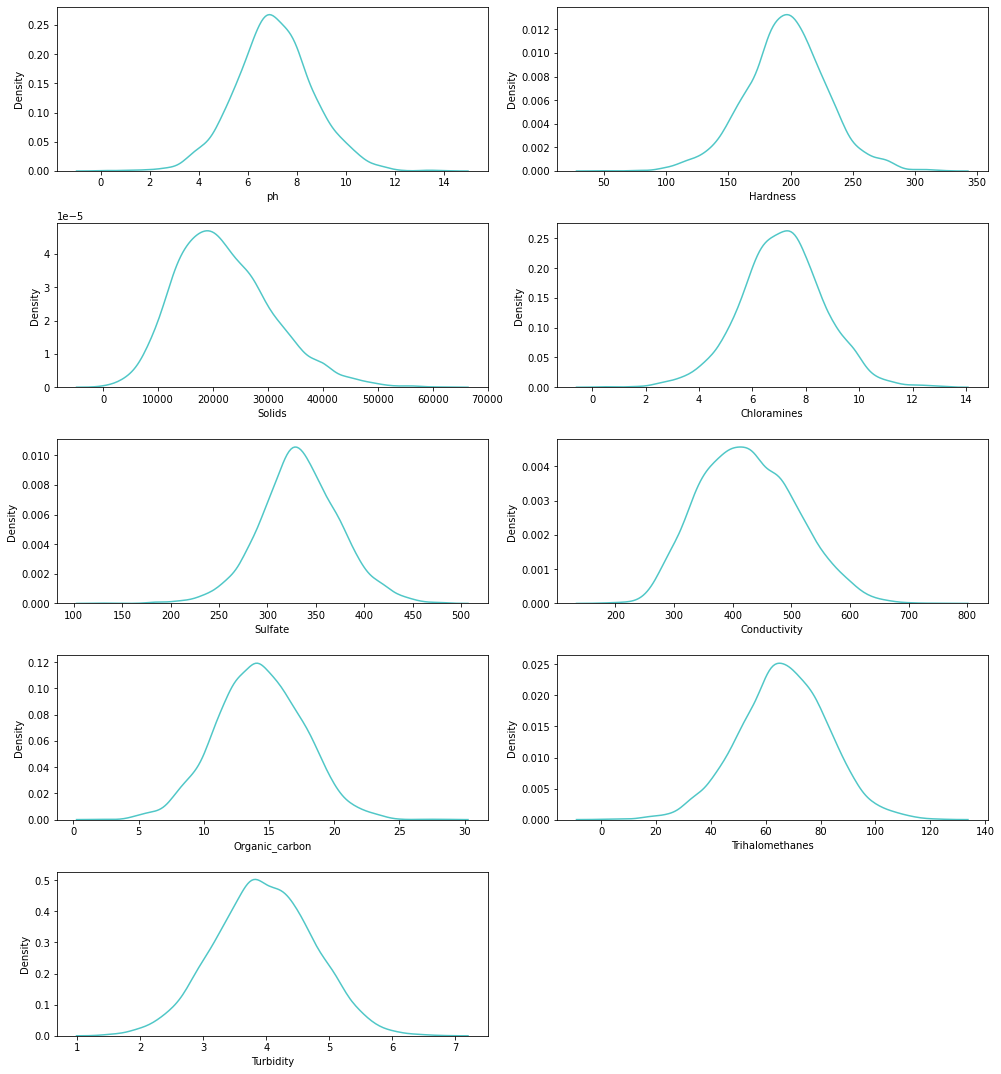

In [6]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize=(14,15))
# for index,col in enumerate(water.drop('Potability',axis=1).columns):
#     plt.subplot(5,2,index+1)
#     sbn.distplot(water.drop('Potability', axis=1).loc[:,col].dropna(), kde=False, color ='#50C7C7')
# fig.tight_layout(pad=1.0)

for index,col in enumerate(x.columns):
    plt.subplot(5,2,index+1)
    sbn.distplot(x.loc[:,col].dropna(), color ='#50C7C7',hist=False)
fig.tight_layout(pad=1.0)

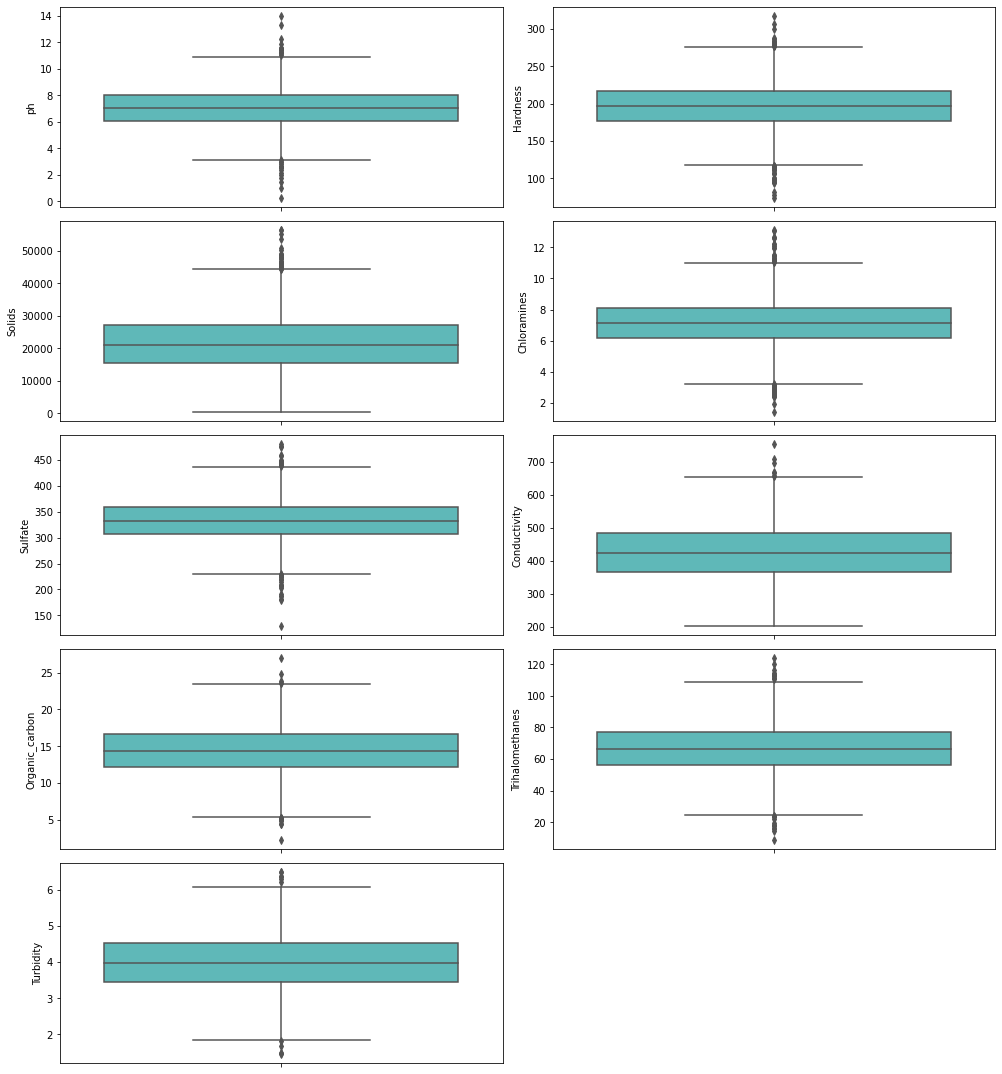

In [7]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(x.columns):
    plt.subplot(5,2,index+1)
    sbn.boxplot(y=col, data=x.dropna(), color ='#50C7C7')
fig.tight_layout(pad=1.0)

<AxesSubplot:>

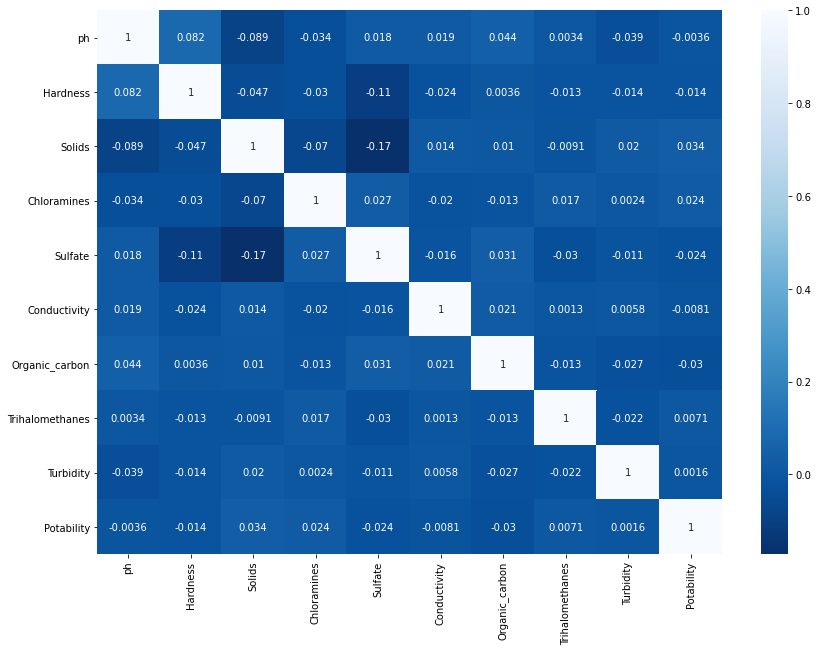

In [8]:
plt.figure(figsize=(14,10))
sbn.heatmap(water.corr(), annot = True,cmap='Blues_r')

In [9]:
simple_imputer = SimpleImputer(strategy = 'median')
water[['ph','Sulfate','Trihalomethanes']]=simple_imputer.fit_transform(water[['ph','Sulfate','Trihalomethanes']])
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,333.073546,392.449580,19.903225,66.622485,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,333.073546,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,333.073546,402.883113,11.168946,77.488213,4.708658,1


In [10]:
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

# Linear Regression Model Output

In [11]:
x = water[['ph','Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']]
y = water['Potability']
x = sa.add_constant(x)
model = sa.OLS(y,x) 
result = model.fit()

In [12]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:             Potability   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.175
Date:                Tue, 24 Aug 2021   Prob (F-statistic):              0.306
Time:                        16:16:54   Log-Likelihood:                -2291.3
No. Observations:                3276   AIC:                             4603.
Df Residuals:                    3266   BIC:                             4664.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.4704      0.146     

## Normality

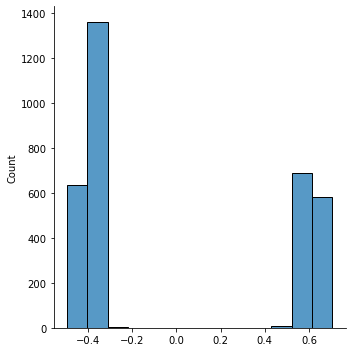

In [13]:
sbn.displot(result.resid)

## Gauss-Markov Assumption

Text(0, 0.5, 'residual')

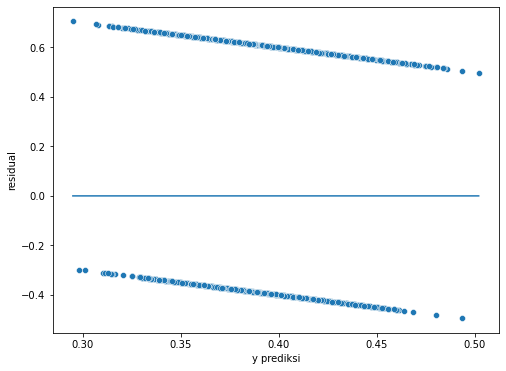

In [14]:
plt.figure(figsize=(8,6))
sbn.scatterplot(x = result.fittedvalues, y= result.resid)
sbn.lineplot(result.fittedvalues, 0)

plt.xlabel('y prediksi')
plt.ylabel('residual')

## Multicollinerity Proving

In [15]:
def calc_vif(x):
    vif = pd.DataFrame()
    vif['Variable'] = x.columns
    vif['Vif'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [16]:
calc_vif(x.drop(columns='const'))

,Variable,Vif
0,ph,22.809050
1,Hardness,30.836022
2,Solids,6.969571
3,Chloramines,19.585579
4,Sulfate,56.176186
5,Conductivity,25.978811
6,Organic_carbon,18.695406
7,Trihalomethanes,17.371757
8,Turbidity,24.128751


From the linear regression model above we can see that the condition such as normality, assumption, and multicollinerity are not properly fulfilled. In the normality diagram we can see the missing value which not shown in the graph. From the Gauss-Markov assumption scatterplot diagram are completely overlapping between top and bottom data point wich suppossed to be distributed near the center line.Lastly is the hyper multicollinerity that causing the unstable of estimator and parameter value. Thus the other model approaches is needed to handle this condition.

# Data Splitting 

In [17]:
x_trainval,x_test,y_trainval,y_test = train_test_split(
 x,
 y,
 test_size= 0.25,
 random_state = 42
)

# Hyperparameter Tuning

In [18]:
logreg = LogisticRegression(solver = 'liblinear', random_state =42)
knn = KNeighborsClassifier(n_neighbors = 5)
tree = DecisionTreeRegressor(criterion = 'mae', max_depth = 5, random_state = 42)
rf = RandomForestClassifier(n_estimators = 300, max_features = 2, max_depth = 3)
model_xgb = XGBClassifier(n_estimators = 200, learning_rate = 0.1, max_depth = 3, random_state = 10)

In [19]:
def model_evaluation(model, metrics):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, x_trainval, y_trainval, cv = skfold)
    print(model_cv)
    print(model_cv.mean())
    print(model_cv.std(),'\n')

In [20]:
print('Logistic Regression Score','\n')
(model_evaluation(logreg, 'f1'))
print('KNN Score','\n')
(model_evaluation(knn, 'f1'))
print('Decision Tree Score','\n')
(model_evaluation(tree, 'f1'))
print('Random Forest Score','\n')
(model_evaluation(rf, 'f1'))
print('XGBoost Classifier Score','\n')
(model_evaluation(model_xgb, 'f1'))

Logistic Regression Score 

[0.60569106 0.60569106 0.60692464 0.60488798 0.60488798]
0.6056165449638204
0.0007461674172179791 

KNN Score 

[0.54674797 0.58536585 0.54786151 0.54786151 0.53971487]
0.5535103406023877
0.016215036949970688 

Decision Tree Score 

[-0.64249637 -0.58292396 -0.69033627 -0.52537402 -0.53389566]
-0.5950052533167931
0.06335969944101057 

Random Forest Score 

[0.61382114 0.63211382 0.61099796 0.62321792 0.61099796]
0.6182297617273524
0.008266590975939384 

XGBoost Classifier Score 

[16:17:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:17:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the obje

Random forest classifier has the better evaluation score among the other models

In [21]:
def acc_eval(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Accuracy score =',accuracy_score(y_test,y_pred),'\n')

In [22]:
# print('Random Forest Classifier')
# acc_eval(rf)
# print('XGBoost Classifier')
# acc_eval(model_xgb)
# print('KNN')
# acc_eval(knn)
# print('Logistic Regression')
# acc_eval(logreg)
# print('DT Regressor')
# acc_eval(tree)

In [23]:
df = pd.DataFrame({
    'Model':['Random Forest Class','XGBoost Class','KNN','Logistic Regression','DT Regressor'],
    'Score':[0.6361416361416361,0.6605616605616605,0.5653235653235653 ,0.6227106227106227 ,0.6349206349206349 ],
    })
df

,Model,Score
0,Random Forest Class,0.636142
1,XGBoost Class,0.660562
2,KNN,0.565324
3,Logistic Regression,0.622711
4,DT Regressor,0.634921


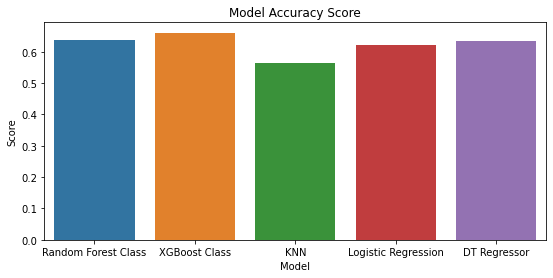

In [24]:
plt.figure(figsize=(9,4))
sbn.barplot(data = df, x = 'Model', y = 'Score')
plt.title('Model Accuracy Score')
plt.show()

In [25]:
df['Score'].mean()*100

62.39316239316239

In the output score above show the average accuracy score is between 62.3%.But among the three model above random forest classifier has the highest score, so after this we will try to measure the performance of tree model in test due to the highest score.

# Modelling performance in test

In [26]:
rf = RandomForestClassifier(n_estimators = 300, max_features = 2, max_depth = 3)
rf.fit(x_trainval, y_trainval)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=300)

In [27]:
y_pred = rf.predict(x_test)

In [28]:
f1_score,recall_score,precision_score

(<function sklearn.metrics._classification.f1_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 <function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>,
 <function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>)

In [29]:
print(f1_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.11480362537764349
0.061488673139158574
0.8636363636363636


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78       510
           1       0.86      0.06      0.11       309

    accuracy                           0.64       819
   macro avg       0.75      0.53      0.45       819
weighted avg       0.72      0.64      0.53       819



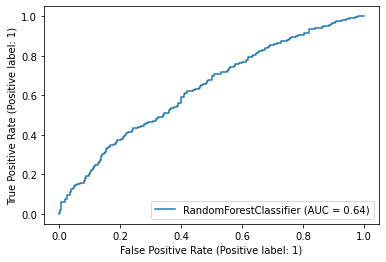

In [31]:
plot_roc_curve(rf, x_test, y_test)

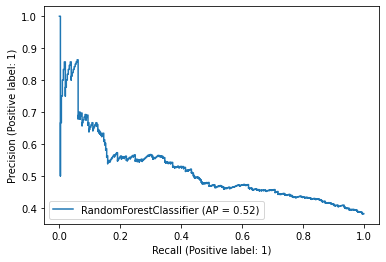

In [32]:
plot_precision_recall_curve(rf, x_test, y_test)

In [33]:
x.shape[0]*0.2

655.2

# Data Splitting 2

In [34]:
x_train,x_val,y_train,y_val = train_test_split(
    x_trainval,
    y_trainval,
    stratify = y_trainval, #agar menjaga proporsi default pada train dan test sama
    test_size = 655, 
    random_state =42
)

## Hyperparameter tuning choose

In [35]:
hyper_param = {
    'n_estimators' : [100,200,300,400], #makin kecil angka makin overfitting dan sebaliknya maka underfitting #panjang 4
    'max_features' : [2,4],
    'max_depth' : [2,3,4,5], #panjang 2
}
#berarti mencoba 72 kombinasi
#pilih 20 dari 72
rf = RandomForestClassifier(n_estimators = 300, max_features = 2, max_depth = 3)
random = RandomizedSearchCV(
    rf,
    param_distributions = hyper_param,
    n_iter = 20,
    cv = 5,
    scoring = 'r2',
    random_state = 42,
    n_jobs = -1
)

In [36]:
random.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=3, max_features=2,
                                                    n_estimators=300),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5],
                                        'max_features': [2, 4],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42, scoring='r2')

In [37]:
random.best_score_

-0.4914795943294189

In [38]:
random.best_params_

{'n_estimators': 300, 'max_features': 4, 'max_depth': 5}

In [39]:
hasilcv=pd.DataFrame(random.cv_results_)
hasilcv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.944497,0.010359,0.043497,0.002337,200,4,5,"{'n_estimators': 200, 'max_features': 4, 'max_...",-0.416233,-0.482261,-0.558341,-0.581600,-0.453676,-0.498422,0.062494,2
1,1.668792,0.053131,0.106150,0.011483,400,4,3,"{'n_estimators': 400, 'max_features': 4, 'max_...",-0.532317,-0.586482,-0.593229,-0.604859,-0.581600,-0.579697,0.024943,9
2,0.392902,0.027222,0.029491,0.011138,100,2,5,"{'n_estimators': 100, 'max_features': 2, 'max_...",-0.555534,-0.528582,-0.546711,-0.639747,-0.546711,-0.563457,0.039141,5
3,0.747143,0.044005,0.046714,0.009414,200,2,4,"{'n_estimators': 200, 'max_features': 2, 'max_...",-0.578751,-0.609643,-0.558341,-0.616488,-0.581600,-0.588964,0.021361,10
4,0.318548,0.011331,0.024416,0.001655,100,2,3,"{'n_estimators': 100, 'max_features': 2, 'max_...",-0.625185,-0.644383,-0.628117,-0.651376,-0.616488,-0.633110,0.012843,16
5,0.658371,0.035644,0.042089,0.002749,200,2,3,"{'n_estimators': 200, 'max_features': 2, 'max_...",-0.613576,-0.655963,-0.593229,-0.628117,-0.616488,-0.621475,0.020585,15
6,1.626188,0.034657,0.067304,0.012481,300,4,5,"{'n_estimators': 300, 'max_features': 4, 'max_...",-0.427841,-0.435940,-0.546711,-0.558341,-0.488564,-0.491480,0.054155,1
7,0.778202,0.059325,0.042370,0.002853,200,2,5,"{'n_estimators': 200, 'max_features': 2, 'max_...",-0.555534,-0.563322,-0.558341,-0.581600,-0.569970,-0.565753,0.009319,6
8,0.395178,0.012490,0.033533,0.008815,100,4,3,"{'n_estimators': 100, 'max_features': 4, 'max_...",-0.543926,-0.586482,-0.616488,-0.581600,-0.558341,-0.577367,0.024947,8
9,0.329727,0.007834,0.025701,0.002648,100,2,2,"{'n_estimators': 100, 'max_features': 2, 'max_...",-0.648402,-0.655963,-0.628117,-0.628117,-0.651376,-0.642395,0.011904,17


In [40]:
hasilcv[hasilcv['param_n_estimators']==300][hasilcv['param_max_features']==4][hasilcv['param_max_depth']==5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,1.626188,0.034657,0.067304,0.012481,300,4,5,"{'n_estimators': 300, 'max_features': 4, 'max_...",-0.427841,-0.43594,-0.546711,-0.558341,-0.488564,-0.49148,0.054155,1


# Model Before And After

In [41]:
rf = RandomForestClassifier(n_estimators = 300, max_features = 2, max_depth = 3)
rf2 = RandomForestClassifier(n_estimators = 300, max_features = 4, max_depth = 5)

In [42]:
def final_eval(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print('Mean squared error score =',mean_squared_error(y_test,y_pred))
    print('R2 score =',r2_score(y_test,y_pred))
    print('Accuracy score =',accuracy_score(y_test,y_pred))

In [43]:
final_eval(rf)

Mean squared error score = 0.36507936507936506
R2 score = -0.5539120502569961
Accuracy score = 0.6349206349206349


In [44]:
final_eval(rf2)

Mean squared error score = 0.3321123321123321
R2 score = -0.4135922330097088
Accuracy score = 0.6678876678876678
